#IS 470 4

---

# Clustering and Association Rule Mining


## Part 1. Clustering with Walmart Visit Data <br>
Data: Walmart held its 3rd Kaggle "recruiting" competition (https://www.kaggle.com/c/walmart-recruiting-trip-type-classification) in Fall 2015 to attract data scientists interested in getting jobs at Walmart.<br>
<br>
Walmart uses both art and science to continually make progress on their core mission of better understanding and serving their customers. One way Walmart is able to improve customers' shopping experiences is by segmenting their store visits into different trip types.<br>
<br>
Whether they're on a last minute run for new puppy supplies or leisurely making their way through a weekly grocery list, identify trip types enables Walmart to create the best shopping experience for every customer.
<br><br>
VARIABLE DESCRIPTIONS:<br>
unique_items: the number of unique UPC numbers of the products purchased in a visit<br>
total_purchase_quantity: the total number of the items that were purchased in a visit <br>
total_return_quantity:  the total number of the items returned in a visit<br>
net_quantity: total_purchase_quantity - total_return_quantity<br>
unique_departments: the number of unique departments representing the purchased items in a visit.<br>
departments_with_returns: the number of unique departments representing the returned items in a visit.<br>

### 1.Upload and clean data

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Walmart_2015_visits_sample.csv to Walmart_2015_visits_sample.csv
User uploaded file "Walmart_2015_visits_sample.csv" with length 161166 bytes


In [ ]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [ ]:
# Read data
Walmart = pd.read_csv('Walmart_2015_visits_sample.csv')
Walmart

,unique_items,total_purchase_quantity,total_return_quantity,net_quantity,uniq_departments,departments_with_returns
0,1,0,1,-1,1,1
1,2,1,1,0,1,1
2,1,0,1,-1,1,1
3,1,0,1,-1,1,1
4,2,3,0,3,2,0
...,...,...,...,...,...,...
11623,6,9,0,9,5,0
11624,15,15,0,15,6,0
11625,10,10,0,10,4,0
11626,14,15,0,15,6,0


In [ ]:
# Examine the number of rows and cols
Walmart.head()

,unique_items,total_purchase_quantity,total_return_quantity,net_quantity,uniq_departments,departments_with_returns
0,1,0,1,-1,1,1
1,2,1,1,0,1,1
2,1,0,1,-1,1,1
3,1,0,1,-1,1,1
4,2,3,0,3,2,0


In [ ]:
# Examine variable type
Walmart.dtypes

unique_items                int64
total_purchase_quantity     int64
total_return_quantity       int64
net_quantity                int64
uniq_departments            int64
departments_with_returns    int64
dtype: object

### 2.Prepare data set for clustering (2 points)

In [ ]:
# Apply minmax normalization (2 points)
min_max_scaler = preprocessing.MinMaxScaler()
Walmart_normalized = pd.DataFrame(min_max_scaler.fit_transform(Walmart))
Walmart_normalized.columns = Walmart.columns
Walmart_normalized

,unique_items,total_purchase_quantity,total_return_quantity,net_quantity,uniq_departments,departments_with_returns
0,0.000000,0.000000,0.019231,0.269841,0.00,0.1
1,0.008929,0.007299,0.019231,0.275132,0.00,0.1
2,0.000000,0.000000,0.019231,0.269841,0.00,0.1
3,0.000000,0.000000,0.019231,0.269841,0.00,0.1
4,0.008929,0.021898,0.000000,0.291005,0.05,0.0
...,...,...,...,...,...,...
11623,0.044643,0.065693,0.000000,0.322751,0.20,0.0
11624,0.125000,0.109489,0.000000,0.354497,0.25,0.0
11625,0.080357,0.072993,0.000000,0.328042,0.15,0.0
11626,0.116071,0.109489,0.000000,0.354497,0.25,0.0


### 3.Clustering model (26 points)

In [ ]:
# Perform k-mean clustering with n_clusters = 2. Set random_state=0. (2 points)
model1 = KMeans(n_clusters=2, random_state=0)
model1.fit(Walmart_normalized)

KMeans(n_clusters=2, random_state=0)

In [ ]:
# Generate the cluster labels (1 point)
model1.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
# Show cluster size (1 point)
Counter(model1.labels_)

Counter({0: 9328, 1: 2300})

In [ ]:
# Show cluster centroids (2 points)
pd.DataFrame({'cluster 1':Walmart[model1.labels_==0].mean(axis=0), 'cluster 2':Walmart[model1.labels_==1].mean(axis=0)})

,cluster 1,cluster 2
unique_items,2.778087,21.734348
total_purchase_quantity,2.995283,25.933478
total_return_quantity,0.278945,0.200000
net_quantity,2.716338,25.733478
uniq_departments,1.970519,8.806087
departments_with_returns,0.199936,0.148696


Q1. Describe at least three differences between the two clusters (3 points)<br>
1. Cluster 1 has significantly less unique items purchased compared to Cluster<br> 
2. Cluster 1 has a significantly smaller total purchase quanitity in comparison to Cluster 2<br>
3. Cluster 2 net quantity is much larger than Cluster 1<br>

In [ ]:
# Perform k-mean clustering with n_clusters = 4. Set random_state=0. (2 points)
model2 = KMeans(n_clusters=4, random_state=0)
model2.fit(Walmart_normalized)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# Generate the cluster labels (1 point)
model2.labels_

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
# Show cluster size (1 point)
Counter(model2.labels_)

Counter({0: 7972, 1: 2088, 2: 1232, 3: 336})

In [ ]:
# Show cluster centroids (2 points)
pd.DataFrame({'cluster 1':Walmart[model2.labels_==0].mean(axis=0), 'cluster 2':Walmart[model2.labels_==1].mean(axis=0), 'cluster 3':Walmart[model2.labels_==2].mean(axis=0),  'cluster 4':Walmart[model2.labels_==3].mean(axis=0) })

,cluster 1,cluster 2,cluster 3,cluster 4
unique_items,1.953588,9.391762,20.876623,44.639881
total_purchase_quantity,1.987205,11.130268,24.678571,53.872024
total_return_quantity,0.307451,0.116858,0.213474,0.309524
net_quantity,1.679754,11.013410,24.465097,53.562500
uniq_departments,1.513547,5.294061,9.125000,12.717262
departments_with_returns,0.219518,0.090517,0.148539,0.252976


Q2. Interpret each cluster based on your understanding. (2 points)<br>
Cluster 1 is small purchases. It has a rather low amount of unique items (1.953588) and small quantity (1.987205) of items<br>
Cluster 2 are medium sized purchases. It has medium amount of unique items (9.391762) purchased and medium quanity of items purchase (11.130268)<br>
Cluster 3 is rather large purchases. It has large amount of unique items (20.876623) purchased and large quanity of items purchase (24.678571)<br>
Cluster 4 is very large purchases. It has a very large amount of unique items (44.639881) purchased and a very large quanity of items purchase (53.872024).

Q3. Assign a meaningful name to each cluster based on the purchasing pattern. Explain the reasons for the name you choose. (2 points)<br>
To give a few hypothetical examples of trip types: a customer may make a small daily dinner trip, a weekly large grocery trip, a trip to buy gifts for an upcoming holiday, or a trip to buy seasonal items.<br>
Cluster 1 is a quick grocery store run (quick stop). I choose this because the quantity of products and variety is rather low. It is like when somebody forgot to buy ketchup for their dinner they had planned or they don't have any pasta sauce for their spaghetti so they make a quick grocery run.<br>
Cluster 2 is a grocery store run for a 1-2 person household (roomates). I chose this because the quantity of products and variety of departments is equivalent to someone who is grocery shopping for themselves or their apartment. Such as a student in an apartment in college with a roomate shopping.<br>
Cluster 3 is a grocery store run for a 4+ person household (family). I chose this because the quantity and variety is rather large. Similar to when my family and I go grocery shopping.
<br>
Cluster 4 is a trip to buy supplies and food for a party or holiday. (Such as birthday, graduation event, family get together, etc.). I chose this because the quantity and variety is very large and would make sense if planning for an event such as a holiday or gathering celebration of some sort.<br>

Q4. What marketing strategy you can use based on your clustering result? (4 points)<br>
For cluster 1, I would use a marketing strategy such as social media marketing. By using social media marketing you could target individuals to go pickup a particular product or remind them they need to pick something up.<br>
For cluster 2, I would use marketing strategy such as sending coupons to their apartment or house mailbox.<br>
For cluster 3, I would use marketing strategy such as bulk discounts. For example, if a family comes to purchase items, if they get a bag of chips for 3.00 dollars they could get 2 bags of chips for 5.00 dollars instead. Since it is a family most likely or a purchase for larger household, they are more likely to purchase an additional item for the savings.<br>
For cluster 4, I would employ a combination of marketing strategies. Since it is for holidays and events, I would use mail in coupons and social media marketing for deals on upcoming holidays such as Christmas, Easter, and graduation events. By doing so you can maxiize profits since you are reminding customers of your deals for popular holiday events.

Q5. Based on the cluster size and centroids, which n_clusters (n_clusters=2 or n_clusters=4) provides better clustering results, and why? (2 points)<br>
n=4 clusters offers better clustering results. This is because it offers more data and information to make better assumptions on what each cluster's audience is. Thereby, allowing us to market better to each cluster.

Text(0.5, 1.0, 'Elbow Test')

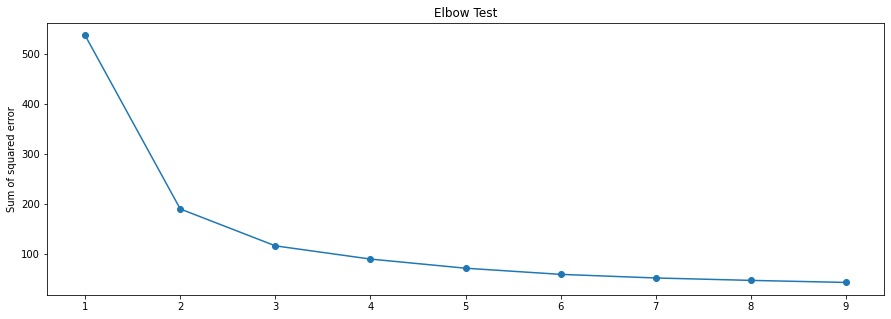

In [ ]:
# Elbow test to determine optimal number of clusters
Sum_of_squared_error = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Walmart_normalized)
    Sum_of_squared_error.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.scatter(range(1, 10), Sum_of_squared_error)
plt.plot(range(1, 10), Sum_of_squared_error)
plt.ylabel('Sum of squared error')
plt.title('Elbow Test')

Q6. What is the optimal n_clusters based on the elbow test results? (1 point)<br>
Optimal n_clusters is 3

## Part 2. Association Rule Mining with Walmart basket data <br>
Walmart_2015_dept_baskets_.csv is derived from the same data source to represent shopping baskets based on DepartmentDescription as a high level indication of item type in a basket.<br>



### 1.Upload and clean data

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Walmart_2015_dept_baskets_.csv to Walmart_2015_dept_baskets_.csv
User uploaded file "Walmart_2015_dept_baskets_.csv" with length 4749383 bytes


In [ ]:
# Import libraries
! pip install apyori
import pandas as pd
import numpy as np
from csv import reader
import seaborn as sns
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=00a50db067bd969b74cb9923e94843a729961020b0ddd691ac7f8c2f0092b437
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
# Read data line by line
Dept_baskets = []
with open('Walmart_2015_dept_baskets_.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        Dept_baskets.append(row)

In [ ]:
# Inspect the first 5 transactions
Dept_baskets[:5]

[['FINANCIAL SERVICES'],
 ['SHOES', 'PERSONAL CARE'],
 ['PAINT AND ACCESSORIES',
  'DSD GROCERY',
  'MEAT - FRESH & FROZEN',
  'DAIRY',
  'PETS AND SUPPLIES',
  'HOUSEHOLD CHEMICALS/SUPP',
  'nan'],
 ['IMPULSE MERCHANDISE', 'PRODUCE'],
 ['DSD GROCERY', 'CANDY, TOBACCO, COOKIES']]

### 2.Data exploration (8 points)

In [ ]:
# Show the number of transactions (1 point)
len(Dept_baskets)

95674

In [ ]:
# Show the number of unique departments (1 point)
flat_list = np.concatenate(Dept_baskets).flat
unique_item, item_count = np.unique(flat_list, return_counts=True)
print("number of unique items:", len(unique_item))

number of unique items: 69


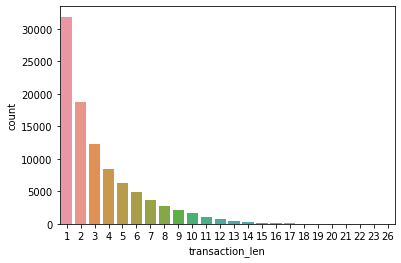

In [ ]:
# Plot the distribution of transaction length (1 point)
transaction_len = []
for transaction in Dept_baskets:
  transaction_len.append(len(transaction))
sns.countplot(x = 'transaction_len', data = pd.DataFrame({'transaction_len':transaction_len}))

In [ ]:
# Examine the absolute frquency of departments in descending order (1 point)
departments_frequency = pd.DataFrame({'departments':flat_list})
departments_frequency.value_counts()

departments           
DSD GROCERY               29591
GROCERY DRY GOODS         21502
IMPULSE MERCHANDISE       19435
PRODUCE                   18727
DAIRY                     17927
                          ...  
OPTICAL - LENSES             64
CONCEPT STORES               35
OTHER DEPARTMENTS            29
SEASONAL                     28
HEALTH AND BEAUTY AIDS        2
Length: 69, dtype: int64

Q7. What are the top 3 most frequent departments? (1.5 points)<br>  

1. DSD GROCERY               29591
2. GROCERY DRY GOODS         21502
3. IMPULSE MERCHANDISE       19435







In [ ]:
# Examine the relative frquency of departments in descending order (1 point)
departments_frequency.value_counts()/len(Dept_baskets)

departments           
DSD GROCERY               0.309290
GROCERY DRY GOODS         0.224742
IMPULSE MERCHANDISE       0.203138
PRODUCE                   0.195738
DAIRY                     0.187376
                            ...   
OPTICAL - LENSES          0.000669
CONCEPT STORES            0.000366
OTHER DEPARTMENTS         0.000303
SEASONAL                  0.000293
HEALTH AND BEAUTY AIDS    0.000021
Length: 69, dtype: float64

Q8. What are the support values for top 3 most frequent departments? (1.5 points)<br>

1. DSD GROCERY               0.309290
2. GROCERY DRY GOODS         0.224742
3. IMPULSE MERCHANDISE       0.203138


### 3.Use the apriori algorithm to generate association rules (14 points)

In [ ]:
# Use the apriori command to generate rules with minimal support = 0.1, minimal confidence = 0.35. (2 points)
Dept_baskets_rules = apriori(Dept_baskets, min_support = 0.1, min_confidence = 0.35)
Dept_baskets_rules = list(Dept_baskets_rules)

In [ ]:
# Display all rules (2 points)
# Display all rules
all_rules = pd.DataFrame(columns=('LHS','RHS','support','confidence','lift'))
for i in range(len(Dept_baskets_rules)):
  for rule_ in Dept_baskets_rules[i].ordered_statistics:
    all_rules = all_rules.append({'LHS':','.join(list(rule_.items_base)),'RHS':','.join(list(rule_.items_add)), 'support': Dept_baskets_rules[i].support, 'confidence': rule_.confidence, 'lift': rule_.lift}, ignore_index=True)
pd.options.display.max_rows = 999
all_rules

,LHS,RHS,support,confidence,lift
0,DAIRY,DSD GROCERY,0.116583,0.622190,2.011673
1,DSD GROCERY,DAIRY,0.116583,0.376939,2.011673
2,DAIRY,GROCERY DRY GOODS,0.116197,0.620126,2.759275
3,GROCERY DRY GOODS,DAIRY,0.116197,0.517022,2.759275
4,DSD GROCERY,GROCERY DRY GOODS,0.135794,0.439052,1.953581
5,GROCERY DRY GOODS,DSD GROCERY,0.135794,0.604223,1.953581
6,DSD GROCERY,PRODUCE,0.108399,0.350478,1.790551
7,PRODUCE,DSD GROCERY,0.108399,0.553799,1.790551
8,GROCERY DRY GOODS,PRODUCE,0.106110,0.472142,2.412118
9,PRODUCE,GROCERY DRY GOODS,0.106110,0.542105,2.412118


Q9. How many rules are generated? (1 point)<br>
10 rules are generated

Q10. Interpret the LAST rule based on the values of the support, confidence, and lift (3 points)<br><br>
The support value of the last rule shows that the chances of a customer purchasing Produce and Dairy together in any transaction are 0.106110. The confidence value is saying that if the customer was to buy Produce the probability that they also purchase Dairy is 0.542105. Now, if the customer has already purchased Produce the probability of purchasing Dairy will be increased by the lift value 2.412118 times. Also, if the customer purchased Dairy the probability of purchasing Produce will be increased by the lift value of    2.412118 times. The lift and support values have no directions, they can be interpreted either way. However, confidence must consider direction, from left to right. Therefore, using these values of the last rule we can see that the relationship between Produce and Dairy is an interesting rule and as a business owner you can use this information to strategically place the products and market the products in the store to consumers.


In [ ]:
# Display all rules sorted by confidence levels (1 point)
all_rules.sort_values(by='confidence', ascending=False)

,LHS,RHS,support,confidence,lift
0,DAIRY,DSD GROCERY,0.116583,0.622190,2.011673
2,DAIRY,GROCERY DRY GOODS,0.116197,0.620126,2.759275
5,GROCERY DRY GOODS,DSD GROCERY,0.135794,0.604223,1.953581
7,PRODUCE,DSD GROCERY,0.108399,0.553799,1.790551
9,PRODUCE,GROCERY DRY GOODS,0.106110,0.542105,2.412118
3,GROCERY DRY GOODS,DAIRY,0.116197,0.517022,2.759275
8,GROCERY DRY GOODS,PRODUCE,0.106110,0.472142,2.412118
4,DSD GROCERY,GROCERY DRY GOODS,0.135794,0.439052,1.953581
1,DSD GROCERY,DAIRY,0.116583,0.376939,2.011673
6,DSD GROCERY,PRODUCE,0.108399,0.350478,1.790551


In [ ]:
# Find and display rules containing "GROCERY DRY GOODS" on the left-hand side (1 point)
all_rules[all_rules['LHS'].str.contains('GROCERY DRY GOODS')]

,LHS,RHS,support,confidence,lift
3,GROCERY DRY GOODS,DAIRY,0.116197,0.517022,2.759275
5,GROCERY DRY GOODS,DSD GROCERY,0.135794,0.604223,1.953581
8,GROCERY DRY GOODS,PRODUCE,0.106110,0.472142,2.412118


In [ ]:
# Find and display rules containing "GROCERY DRY GOODS" on the right-hand side (1 point)
all_rules[all_rules['RHS'].str.contains('GROCERY DRY GOODS')]

,LHS,RHS,support,confidence,lift
2,DAIRY,GROCERY DRY GOODS,0.116197,0.620126,2.759275
4,DSD GROCERY,GROCERY DRY GOODS,0.135794,0.439052,1.953581
9,PRODUCE,GROCERY DRY GOODS,0.106110,0.542105,2.412118


Q11. Does GROCERY DRY GOODS have positive effect on DAIRY? and why? (2 points)<br>
Grocery Dry Goods and Dairy has a lift value of   2.759275 which indicates that it does in fact have a positive effect on Dairy. This is because when a lift value is larger than 1 this shows that the occurrence of Grocery Dry Goods has a positive effect on the occurrence of Dairy.

Q12. What is the probability of buying GROCERY DRY GOODS when DAIRY is purchased? (1 point)<br>
probability of buying GROCERY DRY GOODS when DAIRY is purchased is 0.620126

***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the IS470_homework4.ipynb file***
2.   ***Upload the IS470_homework4.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [ ]:
!jupyter nbconvert --to html IS470_homework4.ipynb

[NbConvertApp] Converting notebook IS470_homework4.ipynb to html
[NbConvertApp] Writing 372721 bytes to IS470_homework4.html
